In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

/tmp/ipykernel_119066/3706820736.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
import os
import sys
sys.path.append('/home/thabib/htm_sequence_learning/examples')
os.chdir('/home/thabib/htm_sequence_learning/')
os.getcwd()

'/home/thabib/htm_sequence_learning'

In [2]:
from pathlib import Path
import numpy as np
from IPython.display import display

from examples.iostream_analyzer import compute_input_stats
from htm_sequence_learning.metrics import compute_network_performance

ROOT = os.getcwd() # os.path.join(Path(os.getcwd()).parent.parent)
print(ROOT)

experiments_results_path = os.path.join(ROOT, 'data', 'experiment_results')
reber_strings_dataset_path = os.path.join(ROOT, 'data', 'reber_strings_dataset')

2022-03-22 11:56:43,242 - numexpr.utils : INFO :- NumExpr defaulting to 8 threads.


/home/thabib/htm_sequence_learning


# Loading input stream and experiment results

#### Loading Reber Grammar input stream

In [3]:
rg_io_filename = 'graph1_APVPVZ_numStrings50_ergFalse_sortFalse.npy'

with open(os.path.join(reber_strings_dataset_path, rg_io_filename), 'rb') as dt:
    rg_inputoutput = np.load(dt, allow_pickle=True)
    
print(rg_inputoutput.shape)
rg_inputoutput

(50, 3)


array([['APVPVZ', array([[0, 0, 0, ..., 0, 0, 0],
                         [0, 0, 0, ..., 0, 0, 0],
                         [0, 0, 1, ..., 1, 0, 0],
                         [0, 0, 0, ..., 0, 0, 0],
                         [0, 0, 1, ..., 1, 0, 0]], dtype=int8),
        array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 1, ..., 1, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 1, ..., 1, 0, 0],
               [1, 0, 0, ..., 0, 0, 0]], dtype=int8)],
       ['APVPVZ', array([[0, 0, 0, ..., 0, 0, 0],
                         [0, 0, 0, ..., 0, 0, 0],
                         [0, 0, 1, ..., 1, 0, 0],
                         [0, 0, 0, ..., 0, 0, 0],
                         [0, 0, 1, ..., 1, 0, 0]], dtype=int8),
        array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 1, ..., 1, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 1, ..., 1, 0, 0],
               [1, 0, 0, ..., 0, 0, 0]], dtype=int8)],
       ['APVPVZ', array([[0, 0, 0, ..., 0,

#### Input stream stats

In [4]:
compute_input_stats(rg_iostream=rg_io_filename, print_all=False, make_plots=False, save_figures=False)

2022-03-22 11:41:03,333 - root : INFO :- Reading input stream file...
2022-03-22 11:41:03,339 - root : INFO :- The stream consists of a total of 50 strings. 
    With: 
    Number of characters in total = 300. 
    Mean length of string = 6.0. 
    Median length of string = 6.0. 
    
 Unique Strings = ['APVPVZ']. 
    Number of Unique Strings = 1.


#### Load (pre-saved) results file from the project

In [4]:
result_filename = 'MODELdefault_config_DATASET' + rg_io_filename.replace('.npy', '') + '_NORMALIZEFalse_PRUNEFalse_RUNS1.npz'

with open(os.path.join(experiments_results_path, result_filename), 'rb') as dt:
    res = np.load(dt, allow_pickle=True)
    experiment_results = dict(res)
    
#     with np.load(os.path.join(experiments_results_path, result_filename), allow_pickle=True) as dt:
#     experiment_results = dict(dt)
    
experiment_results.keys()

dict_keys(['total_len_inputstreams', 'string_step_lookups', 'df_results', 'final_networks', 'grammar'])

In [5]:
experiment_results['df_results'][0]

array([['APVPVZ', array([[[0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          ...,
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0]],

                         [[0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          ...,
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0],
                          [0, 0, 0, ..., 0, 0, 0]],

                         [[0, 0, 1, ..., 1, 0, 0],
                          [0, 0, 1, ..., 1, 0, 0],
                          [0, 0, 1, ..., 1, 0, 0],
                          ...,
                          [0, 0, 1, ..., 1, 0, 0],
                          [0, 0, 1, ..., 1, 0, 0],
                          [0, 0, 1, 

# Performance Analysis

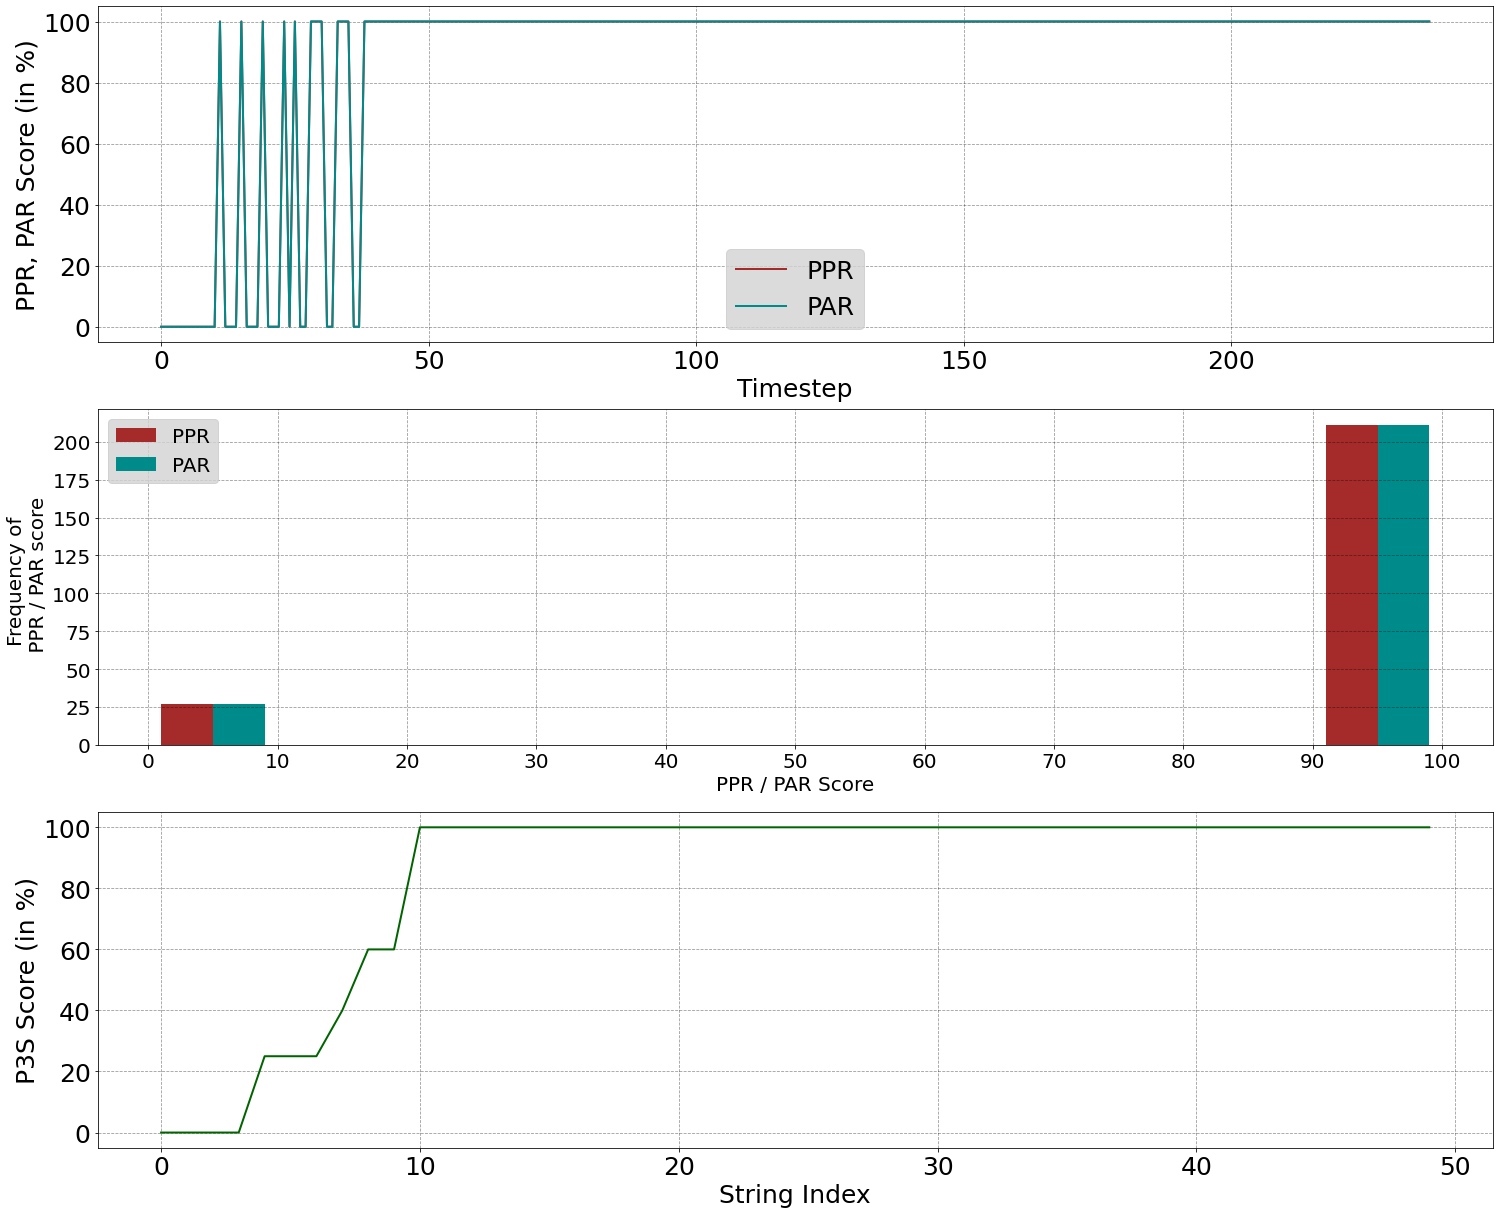

In [5]:
performance_metrics, performance_metrics_average = compute_network_performance(results_=experiment_results,
                                                                               rg_inputoutput=rg_inputoutput,
                                                                               issue_free=False,
                                                                               compute_averages=False,
                                                                               make_plots=True,
                                                                               save_figures=True,
                                                                               fig_filename=result_filename)

# Visualizing Activations and Predictions

# Previous

In [14]:
import os
import sys
# sys.path.append('/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation/ufuncs.py')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
import random
import time
import h5py
import collections

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

from rebergrammar_generator_v3 import *
from experimentor_v4 import Experimentor
from ufuncs import full_pickle, unpickle, compress_pickle, decompress_pickle, get_idx_nonZeroElements

os.getcwd()
# np.set_printoptions(threshold=sys.maxsize)
#-----------------------------------------------------------------------------------------------

# Network params
k = 32
M = 16
N = k*7 # num_chars*k

# Cell params
maxDendritesPerCell = 128 # with 64 maxDendrites and maxSynapses, the performance reached was at 89.75% average.
maxSynapsesPerDendrite = 49 # (=32 + (18-1))
nmdaThreshold = 18
permThreshold = 0.50
learningThreshold = 11
permInit = 0.25
permInit_sd = 0.002

perm_decrement = 0.1 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.20*perm_decrement # p--

verbose = 1
trial = None

## Generate Reber Strings For HTM Learning

In [15]:
# TO BE USED WHEN ONLY STRINGS ARE SPECIFICALLY SELECTED

# Keys are input strings. 
# Values are lists of expected output chars after each input char of the string.

# reber_strings = {
#     'ATSPVZ': [('T','P'), ('S','P'), ('P'), ('V'), ('Z')],
#     'APSTTXZ': [('T','P'), ('S','V'), ('T'), ('T'), ('X'), ('Z')],
#     'APVPVZ': [('T','P'), ('S','V'), ('P'), ('V'), ('Z')],
#     'ATPXSXZ': [('T','P'), ('S','P'), ('X'), ('S'), ('X'), ('Z')]
# }

# reber_strings = {
#     'APVPXVPVZ': [('P'), ('V'), ('P'), ('X'), ('V'), ('P'), ('V'), ('Z')]
# }

reber_strings = {
    'APVPVZ': [('P'), ('V'), ('P'), ('V'), ('Z')]
}

In [16]:
# Task params
graph = '2'

rg = Reber_Grammar(numColumns=N, columnsPerChar=k, graph=graph)
charsMC = rg.df_CharsToMinicols

do_ERG = True
nof_strings = 50

#reber_strings = 'mix'

string_max_length = None
sort_by_length = False

# Generating Input Strings and Predictions
rg_inputoutput = rg.generate_RGInputOutput(do_ERG, nof_strings, reber_strings, string_max_length, sort_by_length)

### Input String Statistics

A total of 50 strings were generated. 

With: 
NOF Unique Strings = 1. 
NOF characters in total = 300. 
Mean length of string = 6.0. 
Median length of string = 6.0.


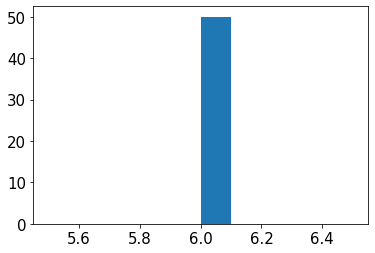

0 APVPVZ
1 APVPVZ
2 APVPVZ
3 APVPVZ
4 APVPVZ
5 APVPVZ
6 APVPVZ
7 APVPVZ
8 APVPVZ
9 APVPVZ
10 APVPVZ
11 APVPVZ
12 APVPVZ
13 APVPVZ
14 APVPVZ
15 APVPVZ
16 APVPVZ
17 APVPVZ
18 APVPVZ
19 APVPVZ
20 APVPVZ
21 APVPVZ
22 APVPVZ
23 APVPVZ
24 APVPVZ
25 APVPVZ
26 APVPVZ
27 APVPVZ
28 APVPVZ
29 APVPVZ
30 APVPVZ
31 APVPVZ
32 APVPVZ
33 APVPVZ
34 APVPVZ
35 APVPVZ
36 APVPVZ
37 APVPVZ
38 APVPVZ
39 APVPVZ
40 APVPVZ
41 APVPVZ
42 APVPVZ
43 APVPVZ
44 APVPVZ
45 APVPVZ
46 APVPVZ
47 APVPVZ
48 APVPVZ
49 APVPVZ


In [17]:
in_strings_alpha = [rg_inputoutput[i][0] for i in range(len(rg_inputoutput))]
dict_count_allTransitions = rg.count_allTransitions(in_strings_alpha)

# NOF TOTAL CHARACTERS in the input stream
total_len_inputstream = 0
for string in in_strings_alpha:
    total_len_inputstream += len(string)
    
# Plotting HISTOGRAM of REBER STRING's LENGTH
len_rg_exs = []

for ex in in_strings_alpha:
    len_rg_exs.append(len(ex))

print(f'A total of {len(in_strings_alpha)} strings were generated. \n\n\
With: \n\
NOF Unique Strings = {len(np.unique(in_strings_alpha))}. \n\
NOF characters in total = {total_len_inputstream}. \n\
Mean length of string = {np.mean(len_rg_exs)}. \n\
Median length of string = {np.median(len_rg_exs)}.')

plt.figure()
plt.hist(len_rg_exs)
plt.show()
    
# Printing all input reber strings    
for i, string in enumerate(in_strings_alpha):
    print(i, string)

# Generating xticks for plots based on characters-minicols
xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch

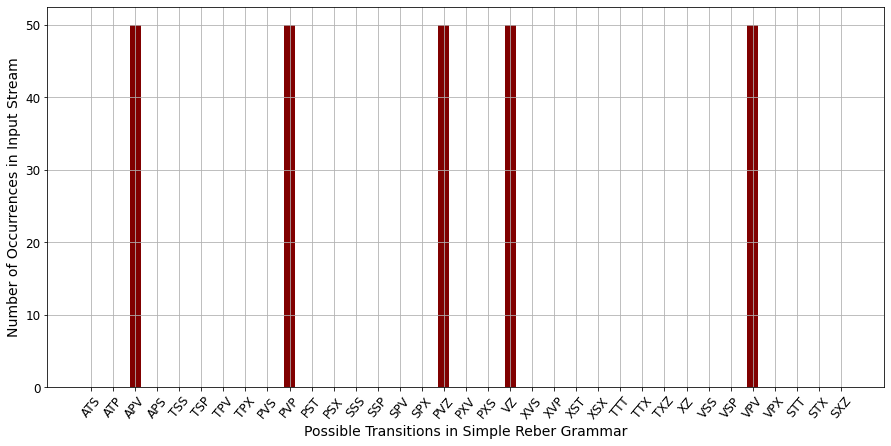

In [5]:
transitions = list(dict_count_allTransitions.keys()) 
counts = list(dict_count_allTransitions.values()) 
   
fig = plt.figure(figsize = (15, 7)) 
  
# creating the bar plot 
plt.bar(transitions, counts, color='maroon' , width = 0.5) 
plt.xlabel('Possible Transitions in Simple Reber Grammar', fontsize=14)
plt.xticks(rotation=50, fontsize=12)
plt.ylabel('Number of Occurrences in Input Stream', fontsize=14) 
plt.yticks(fontsize=12)
#plt.title('NAN')
plt.grid(True)
plt.rc('grid', linestyle="--", color='red', alpha=0.4)
plt.show() 

# Running Experiment

In [18]:
dict_params = {
    'M': M,
    'N': N,
    'k': k,
    'maxDendritesPerCell': maxDendritesPerCell,
    'maxSynapsesPerDendrite': maxSynapsesPerDendrite,
    'nmdaThreshold': nmdaThreshold,
    'permThreshold': permThreshold,
    'learningThreshold': learningThreshold,
    'permInit': permInit,
    'permInit_sd': permInit_sd,
    'perm_decrement': perm_decrement,
    'perm_increment': perm_increment,
    'perm_decay': perm_decay,
    'do_ERG': do_ERG,
    'nof_strings': nof_strings,
    'reber_strings': reber_strings,
    'string_max_length': string_max_length,
    'sort_by_length': sort_by_length,
    'verbose': verbose,
    'trial': trial
}

start = time.time()

exp = Experimentor(cellsPerColumn=M, numColumns=N, columnsPerChar=k, 
                   maxDendritesPerCell=maxDendritesPerCell, maxSynapsesPerDendrite=maxSynapsesPerDendrite, 
                   nmdaThreshold=nmdaThreshold, permThreshold=permThreshold,
                   learningThreshold=learningThreshold,
                   permInit=permInit, permInit_sd = permInit_sd,
                   perm_decrement=perm_decrement, perm_increment=perm_increment, perm_decay=perm_decay,
                   rg=rg, rg_inputoutput=rg_inputoutput,
                   htm_network=None,
                   verbose=verbose)

dict_results = exp.run_experiment()

print(time.time()-start)

# sys.getsizeof(dict_results['results'])

results = dict_results['results']
results.set_index('reber_string', inplace=True)
final_net = dict_results['final_net']


  String_idx:  0  Input String:  APVPVZ

  String_idx:  1  Input String:  APVPVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  2  :::::::::::::::::::::::::::::::::::::::::::  
[((1, 0), 32), ((15, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  2 ::::::::::::::::::::::::::::::::::  

  String_idx:  2  Input String:  APVPVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  2  :::::::::::::::::::::::::::::::::::::::::::  
[((1, 0), 32), ((15, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  2 ::::::::::::::::::::::::::::::::::  

  String_idx:  3  Input String:  APVPVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  2  :::::::::::::::::::::::::::::::::::::::::::  
[((1, 0), 32), ((15, 0), 32)]
  ::::::::::::::::::::::::::::::::::Issue 005 in step:  2 ::::::::::::::::::::::::::::::::::  

  String_idx:  4  Input String:  APVPVZ
  :::::::::::::::::::::::::::::::::::::::::::Issue 003 in col:  2  ::::::::::::::

# Measuring Performance

In [19]:
# Generating xticks for plots based on characters-minicols
xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch


c = 0
for i in results['issue']:
    if i == 'nan':
        c+=1
    else:
        continue
        
#results.iloc[1996]
c

44

In [20]:
pred_acc = []
pred_perf = []
pred_perf_perString = []

for string_idx in range(len(in_strings_alpha)):
    
    performancePerString = []
    
    for step in range(len(results.iloc[string_idx]['htm_preds'])):
        
        correct_preds_cols_idx = np.where(rg_inputoutput[string_idx][2][step])[0]
        # Correct expected predictions for the particular <[string_idx][step]> timestep
        
        predicted_cols_idx = np.unique(np.where(results.iloc[string_idx]['htm_preds'][step])[1])
        # Indices of the cols predicted by the network for particular <[string_idx][step]> timestep.
        
        count=0
        for col_idx in correct_preds_cols_idx:
            if col_idx in predicted_cols_idx:
                count+=1

        if len(predicted_cols_idx) == 0:
            accuracy = 0.0
        else:
            accuracy = (count/len(predicted_cols_idx))*100
        
        performance = (count/len(correct_preds_cols_idx))*100
        
        pred_acc.append((accuracy, (string_idx, step)))
        pred_perf.append((performance, (string_idx, step)))
        performancePerString.append(performance)
        
    pred_perf_perString.append(np.mean(performancePerString))
    
        
MA_pred_perf = []
MA_pred_acc = []
i = 0
while i+100 < len(pred_acc):
    
    MA_pred_perf.append(np.mean([perf_[0] for perf_ in pred_perf[i:i+100]]))
    MA_pred_acc.append(np.mean([acc_[0] for acc_ in pred_acc[i:i+100]]))
    
    i+=1

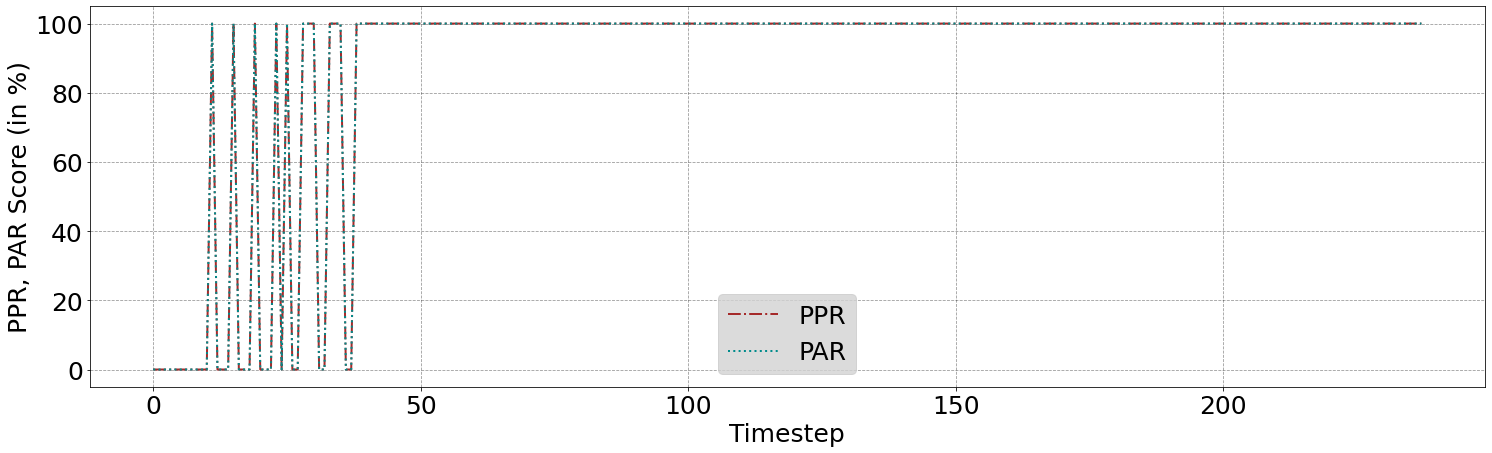

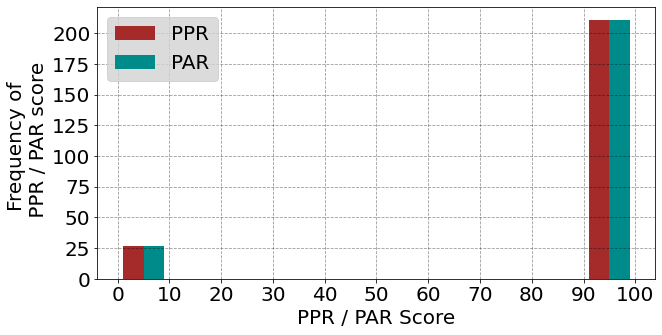

In [40]:
plt.figure(figsize=(25,7))
plt.plot([perf_[0] for perf_ in pred_perf], label='PPR', color='brown', lw=2, linestyle='-.')
plt.plot([acc_[0] for acc_ in pred_acc], label='PAR', color='darkcyan', lw=2, linestyle=':')
plt.ylabel('PPR, PAR Score (in %)', fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Timestep', fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc='lower center', facecolor='lightgrey', fontsize=25)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
#plt.title(f'Mean prediction accuracy (in %): {np.mean([pred_[0] for pred_ in pred_acc])}')
plt.show()

#____________________________FREQUENCY BAR PLOTS_________________________________________
plt.figure(figsize=(10,5))
plt.hist([[perf_[0] for perf_ in pred_perf],[acc_[0] for acc_ in pred_acc]], bins=np.arange(0,110,10),
         color=['brown', 'darkcyan'], label=['PPR', 'PAR'])
plt.ylabel('Frequency of \n PPR / PAR score', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('PPR / PAR Score', fontsize=20)
plt.xticks(np.arange(0,110,10), fontsize=20)
plt.legend(loc='upper left', facecolor='lightgrey', fontsize=20)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
plt.show()
plt.close()

# count_PAR = collections.Counter([acc_[0] for acc_ in pred_acc])
# count_PPR = collections.Counter([perf_[0] for perf_ in pred_perf])

# print('\n\nPAR Frequencies: ')
# for key in sorted(dict(count_PAR).keys()):
#     print(key,':: ', dict(count_PAR)[key])
    
# print('\n\nPPR Frequencies: ')
# for key in sorted(dict(count_PPR).keys()):
#     print(key,':: ', dict(count_PPR)[key])

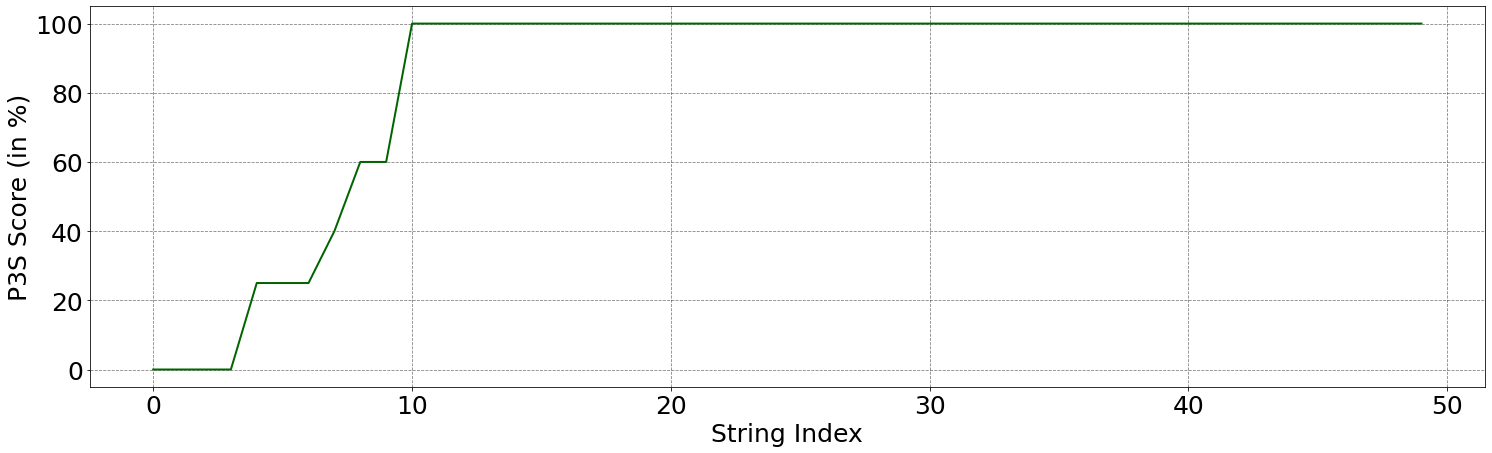

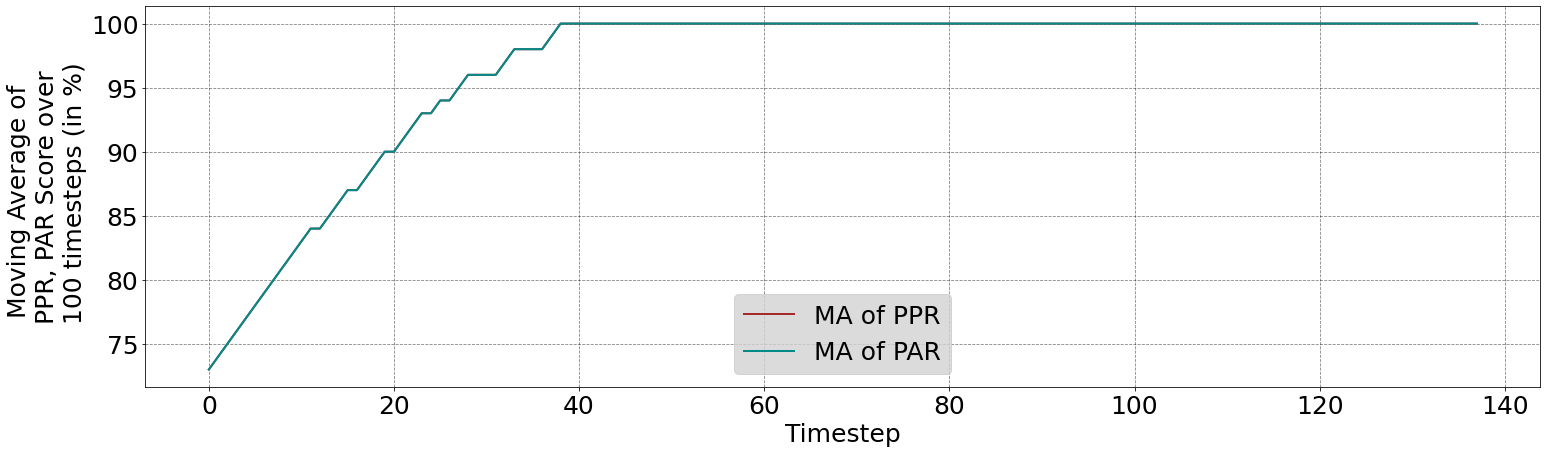

In [22]:
# ____________________PLOTTING P3S SCORE_________________
plt.figure(figsize=(25,7))
plt.plot(pred_perf_perString, label='PPR', color='darkgreen', lw=2)
plt.ylabel('P3S Score (in %)', fontsize=25)
#plt.ylabel('Prediction Performance \n Per String (in %)', fontsize=25)
#plt.text(x=0, y=0, s='Prediction Performance Per String (in %)', wrap=True)
plt.yticks(fontsize=25)
plt.xlabel('String Index', fontsize=25)
plt.xticks(fontsize=25)
plt.grid(True, linestyle="--", color='black', alpha=0.5)
plt.show()
plt.close()

# ____________________FREQUENCY BAR PLOT FOR P3S SCORE_________________
# plt.figure(figsize=(10,5))
# plt.hist(pred_perf_perString, color='darkgreen')
# plt.ylabel('Frequency of P3S', fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlabel('P3S', fontsize=20)
# plt.xticks(fontsize=20)
# plt.show()

# ____________________PLOTTING MOVING AVERAGE OF PAR AND PPR SCORES_________________
plt.figure(figsize=(25,7))
plt.plot(MA_pred_perf, label='MA of PPR', color='brown', lw=2)
plt.plot(MA_pred_acc, label='MA of PAR', color='darkcyan', lw=2)
plt.ylabel('Moving Average of \n PPR, PAR Score over \n 100 timesteps (in %)', fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Timestep', fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc='lower center', facecolor='lightgrey', fontsize=25)
plt.grid(True, linestyle="--", color='black', alpha=0.5)
plt.show()
plt.close()

In [9]:
display(np.mean(pred_perf_perString[1800:]))
display(np.mean(MA_pred_perf[12000:]))
display(np.mean(MA_pred_acc[12000:]))

96.79738606202663

95.88565565144181

85.01536518627655

In [37]:
pred_acc[1000:]

[(100.0, (200, 0)),
 (100.0, (200, 1)),
 (50.0, (200, 2)),
 (100.0, (200, 3)),
 (50.0, (200, 4)),
 (100.0, (201, 0)),
 (100.0, (201, 1)),
 (50.0, (201, 2)),
 (100.0, (201, 3)),
 (50.0, (201, 4)),
 (100.0, (202, 0)),
 (100.0, (202, 1)),
 (50.0, (202, 2)),
 (100.0, (202, 3)),
 (50.0, (202, 4)),
 (100.0, (203, 0)),
 (100.0, (203, 1)),
 (50.0, (203, 2)),
 (100.0, (203, 3)),
 (50.0, (203, 4)),
 (100.0, (204, 0)),
 (100.0, (204, 1)),
 (50.0, (204, 2)),
 (100.0, (204, 3)),
 (50.0, (204, 4)),
 (100.0, (205, 0)),
 (100.0, (205, 1)),
 (50.0, (205, 2)),
 (100.0, (205, 3)),
 (50.0, (205, 4)),
 (100.0, (206, 0)),
 (100.0, (206, 1)),
 (50.0, (206, 2)),
 (100.0, (206, 3)),
 (50.0, (206, 4)),
 (100.0, (207, 0)),
 (100.0, (207, 1)),
 (50.0, (207, 2)),
 (100.0, (207, 3)),
 (50.0, (207, 4)),
 (100.0, (208, 0)),
 (100.0, (208, 1)),
 (50.0, (208, 2)),
 (100.0, (208, 3)),
 (50.0, (208, 4)),
 (100.0, (209, 0)),
 (100.0, (209, 1)),
 (50.0, (209, 2)),
 (100.0, (209, 3)),
 (50.0, (209, 4)),
 (100.0, (210, 0)),


In [15]:
np.where(results.index == results.iloc[1664].name)

(array([1664]),)

In [120]:
xticks_plot[[0,1,2]]

array(['Z', 'X', 'V'], dtype=object)

## HTM States / Activity

In [ ]:
string_idx = 0
step = 0

f = plt.figure(figsize=(28,4))
f = sns.heatmap(results.iloc[string_idx]['htm_states'][step], linewidth=0.1, cmap='viridis', vmax=1, vmin=0, cbar=False, xticklabels=xticks_plot)
# ax_ = plt.twiny()
# ax_.set_xticks(f.get_xticks())
# ax_.set_xbound(f.get_xbound())
# ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
# ax_.tick_params(grid_alpha=0)
plt.show()

In [160]:
%matplotlib notebook

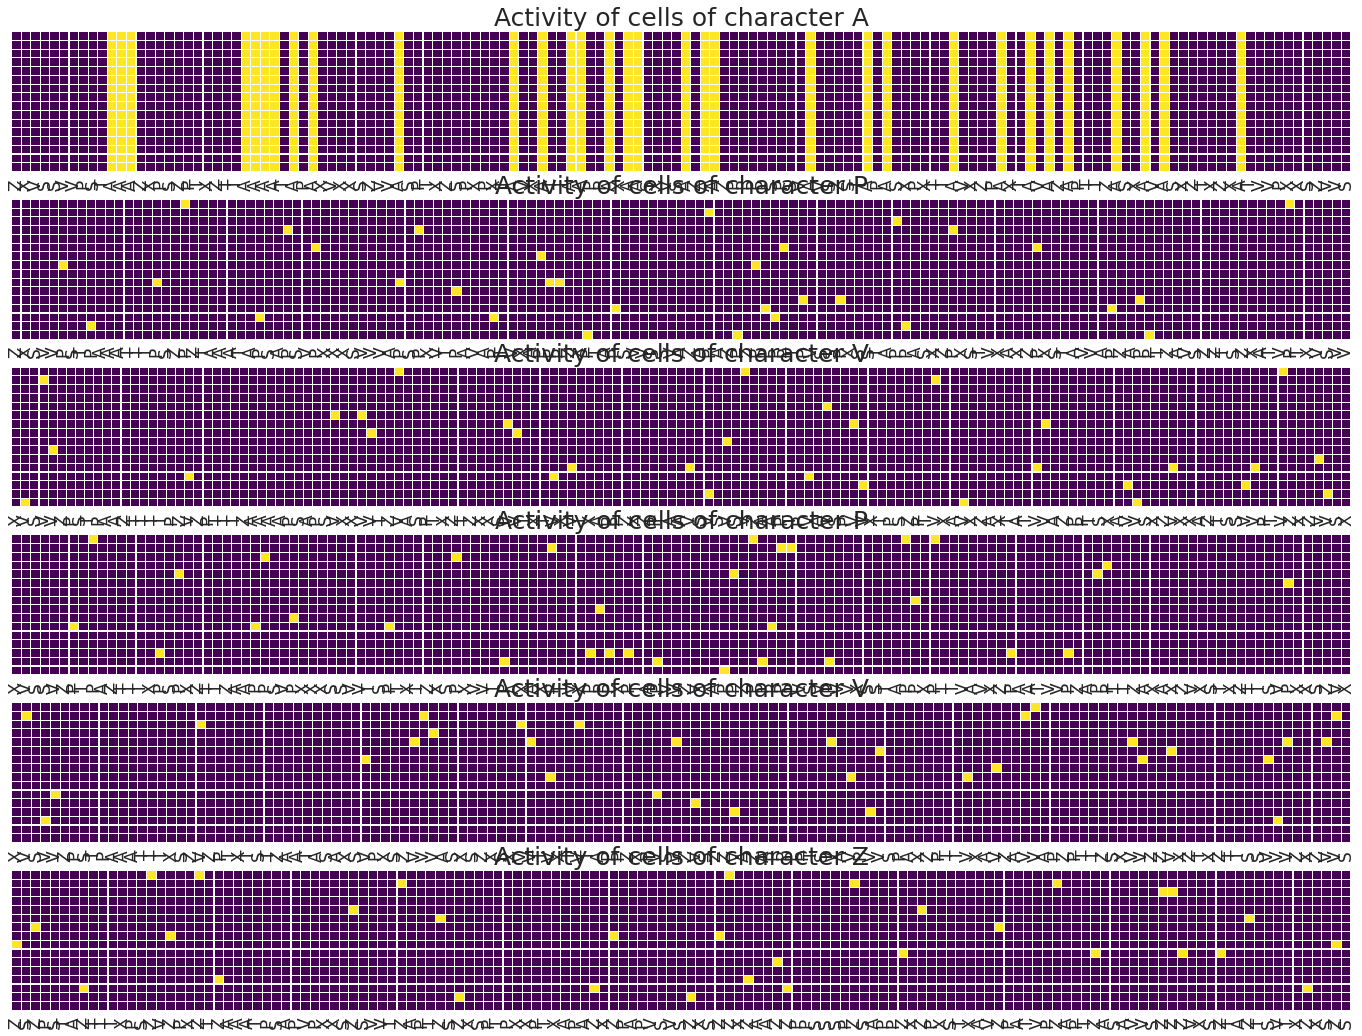

In [34]:
string_idx = 200

sns.set_style("whitegrid")
res_string = results.iloc[string_idx]
string_len = len(res_string.name)
fig, axes = plt.subplots(string_len,1, figsize=(24,3*string_len))
all_cols = [c for c in range(N)]

for step in range(string_len):
    char = res_string.name[step]
    inactive_cols = [col for col in all_cols if res_string['htm_states'][step][:, col].any()==False]
    deleted_cols = random.choices(inactive_cols, k=int(len(inactive_cols)/1.8))
    undeleted_cols = set(all_cols) - set(deleted_cols)
    
    # Plot the current step's character's (cell) activity
    sns.heatmap(res_string['htm_states'][step][:, list(undeleted_cols)], vmax=1, vmin=0, cbar=False, linewidth=0.1, cmap='viridis', 
                xticklabels=xticks_plot[list(undeleted_cols)], ax=axes[step])
    axes[step].set_xticklabels(axes[step].get_xticklabels(), fontsize=17)
    axes[step].set_yticklabels([])
    axes[step].set_title(f'Activity of cells of character {char}', fontsize=25)

#plt.tight_layout()
plt.show()

## HTM Predictions

/home/thabib/anaconda3/envs/tahresearch/lib/python3.8/site-packages/seaborn/matrix.py:342: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  ax.figure.draw(ax.figure.canvas.get_renderer())


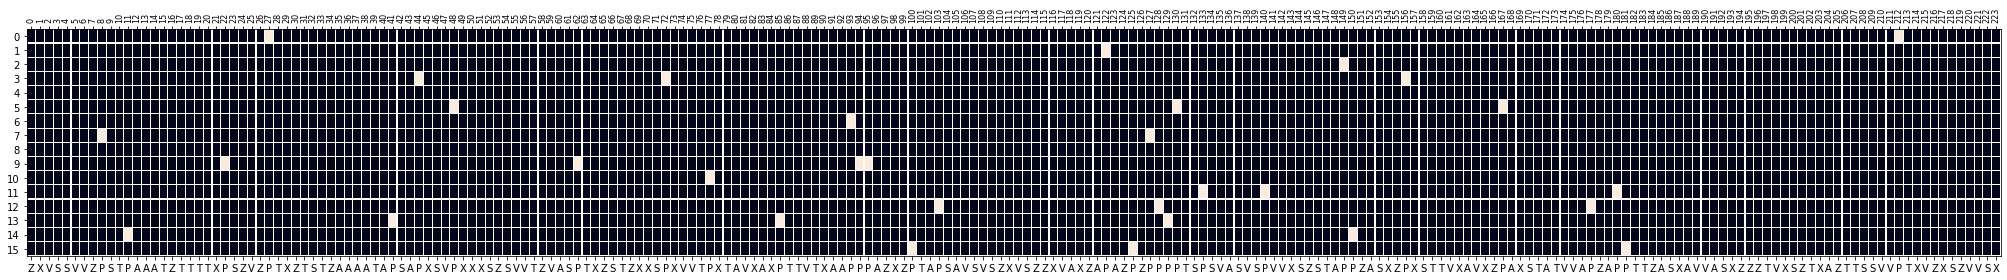

In [111]:
string_idx = 49
step = 0

predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] 
                  for idx in np.where(results.iloc[string_idx]['htm_preds'][step])[1]])
multiplying_arr = np.zeros(N)
for k in range(len(predicted_chars)):
    multiplying_arr[list(charsMC[predicted_chars[k]])] = 1/(k+1)

plot_predictions=[results.iloc[string_idx]['htm_preds'][step][j]*multiplying_arr
                  for j in range(M)]

f = plt.figure(figsize=(28,4))
f = sns.heatmap(plot_predictions, cmap='cubehelix', vmax=1, vmin=0, cbar=False, linewidth=0.1, xticklabels=xticks_plot)
ax_ = plt.twiny()
ax_.set_xticks(f.get_xticks())
ax_.set_xbound(f.get_xbound())
ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
ax_.tick_params(grid_alpha=0)
plt.show()

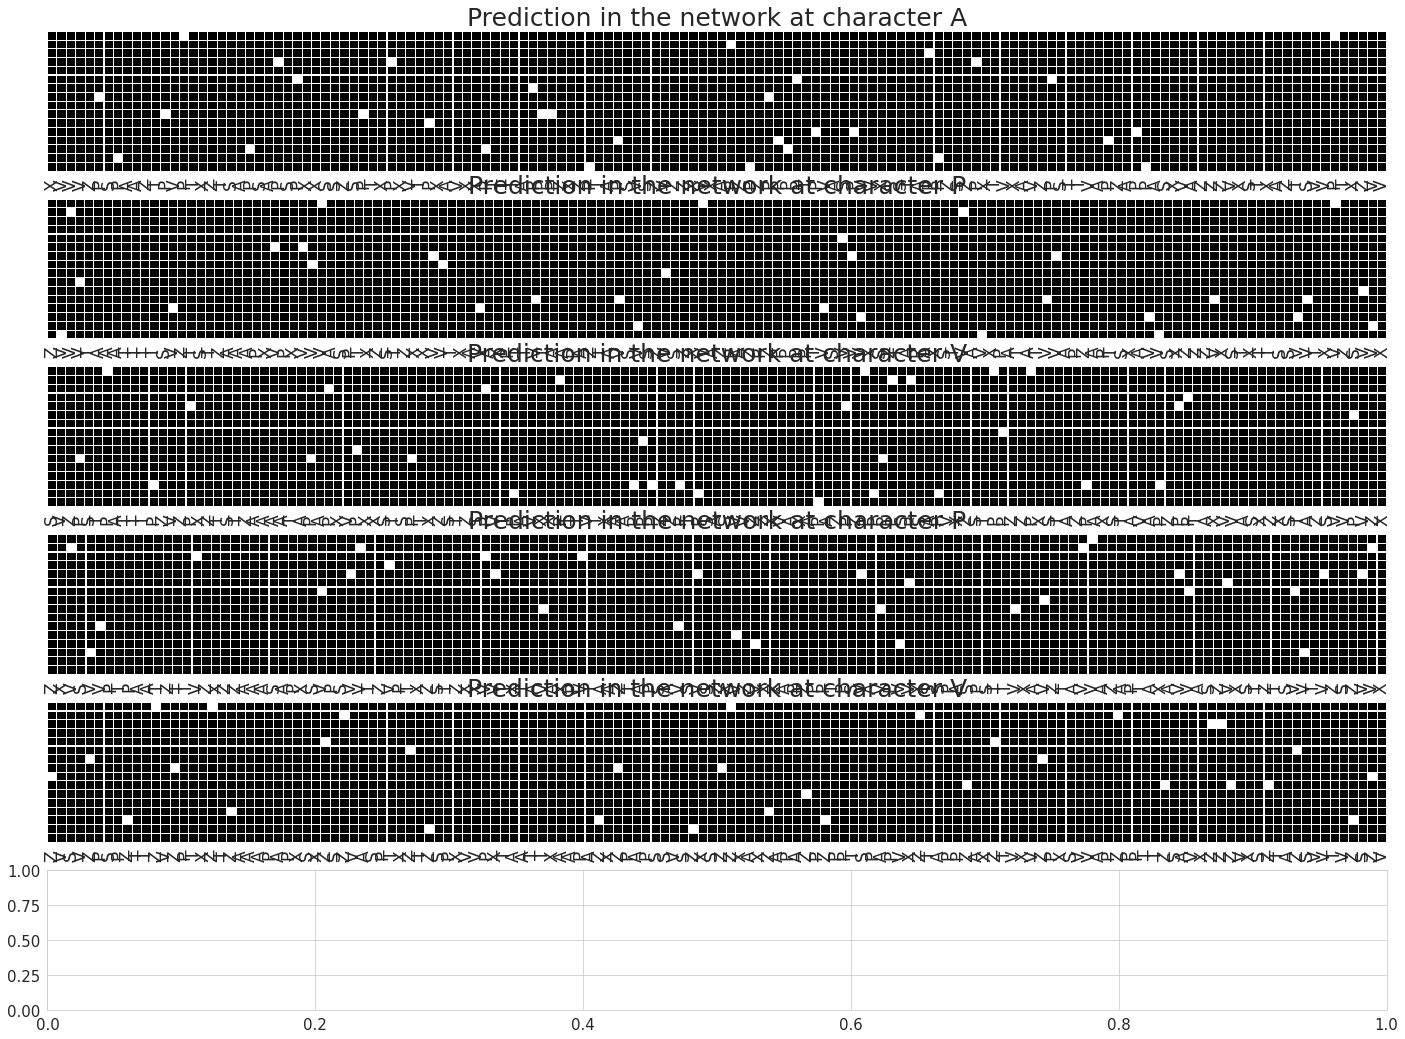

In [35]:
string_idx = 200

sns.set_style("whitegrid")
res_string = results.iloc[string_idx]
string_len = len(res_string.name)
fig, axes = plt.subplots(string_len,1, figsize=(24,3*string_len))
all_cols = [c for c in range(N)]

for step in range(string_len-1):
    char = res_string.name[step]

    predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] for idx in np.where(res_string['htm_preds'][step])[1]])
    multiplying_arr = np.zeros(N)
    for k in range(len(predicted_chars)):
        multiplying_arr[list(charsMC[predicted_chars[k]])] = 1/(k+1)

    plot_predictions=np.array([res_string['htm_preds'][step][j]*multiplying_arr for j in range(M)])
    
    unpredicted_cols = [col for col in all_cols if plot_predictions[:, col].any()==False]
    deleted_cols = random.choices(unpredicted_cols, k=int(len(unpredicted_cols)/1.8))
    undeleted_cols = set(all_cols) - set(deleted_cols)
    
    
    # Plot the current step's character's (cell) predictivity
    sns.heatmap(plot_predictions[:, list(undeleted_cols)], cmap='cubehelix',
                vmax=1, vmin=0, cbar=False, linewidth=0.1, xticklabels=xticks_plot[list(undeleted_cols)], ax=axes[step])
#     sns.heatmap(plot_predictions, 
#                 vmax=1, vmin=0, cbar=False, linewidth=0.1, xticklabels=xticks_plot, ax=axes[step])
    
    axes[step].set_xticklabels(axes[step].get_xticklabels(), fontsize=17)
    axes[step].set_yticklabels([])
    axes[step].set_title(f'Prediction in the network at character {char}', fontsize=25)

plt.show()

## Number of Dendrites on each Cell

In [205]:
%matplotlib notebook

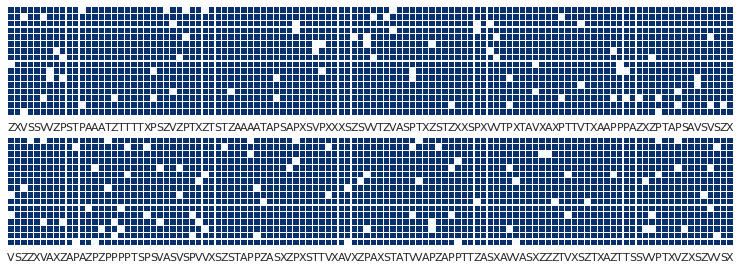

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.])

1.0

In [60]:
countDendrites = np.zeros(shape=[M,N])

for i in range(M):
    for j in range(N):
        countDendrites[i,j] = exp.htm_network.net_arch[i, j].get_cell_numDendrites()


fig, axes = plt.subplots(2,1, figsize=(13,2.2*2))

sns.heatmap(countDendrites[:, 0:int(N/2)], linewidth=0.1, xticklabels=xticks_plot[0:int(N/2)], ax=axes[0], cmap='Blues_r', cbar=False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=11, rotation=0)
axes[0].set_yticklabels([])

sns.heatmap(countDendrites[:, int(N/2):], linewidth=0.1, xticklabels=xticks_plot[int(N/2):], ax=axes[1], cmap='Blues_r', cbar=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=11, rotation=0)
axes[1].set_yticklabels([])

#plt.tight_layout()
plt.show()

display(countDendrites[0])
display(np.amax(countDendrites))

# supported values are 'Accent', 'Accent_r', 'Blues', **'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 
#'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
# 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', ***'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
# 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
# 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 
# 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
# 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
# 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
# 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 
# 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
# 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic',
# 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 
# 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [211]:
countDendrites = np.zeros(shape=[M,N])

for i in range(M):
    for j in range(N):
        countDendrites[i,j] = exp.htm_network.net_arch[i, j].get_cell_numDendrites()

plt.figure(figsize=(35,5))
sns.heatmap(countDendrites, linewidth=0.1, xticklabels=xticks_plot, cmap='Blues')
plt.show()

<IPython.core.display.Javascript object>

/home/thabib/anaconda3/envs/tahresearch/lib/python3.8/site-packages/seaborn/matrix.py:342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax.figure.draw(ax.figure.canvas.get_renderer())


### Dendritic Growth Per Letter

In [10]:
dendritesPerCharPerRun = pd.DataFrame(columns=list(charsMC.columns)) 

avgcount_charwise = []

for ch in list(charsMC.columns):    
    for col in list(charsMC[ch]):
        perColCount = [] # list of k entries
        count_perCol = 0
        for i in range(M):
            count_perCol += final_net[i, col].get_cell_numDendrites()
        perColCount.append(count_perCol)

    avgcount_charwise.append(np.mean(perColCount))

dendritesPerCharPerRun.loc[0] = avgcount_charwise

display(dendritesPerCharPerRun)

# dendritesPerChar = {}

# for ch in list(charsMC.columns):
#     avgcount_dendritesPerColPerCharPerRun = [] # list of 'n_runs' entries
#     sdcount_dendritesPerColPerCharPerRun = [] # list of 'n_runs' entries
    
#     for r in range(n_runs):
#         r_network = list_results[r].iloc[1999]['htm_network']    
    
#         for col in list(charsMC[ch]):
#             perColCount = [] # list of k entries
#             count_perCol = 0
#             for i in range(M):
#                 count_perCol += r_network[i, col].get_cell_numDendrites()
#             perColCount.append(count_perCol)
            
#         avgcount_dendritesPerColPerCharPerRun.append(np.mean(perColCount))
#         sdcount_dendritesPerColPerCharPerRun.append(np.std(perColCount))
            
#     dendritesPerChar[ch] = (avgcount_dendritesPerColPerCharPerRun, sdcount_dendritesPerColPerCharPerRun)

A     T     S     X     P     V     Z
0  0.0  49.0  55.0  42.0  47.0  37.0  32.0

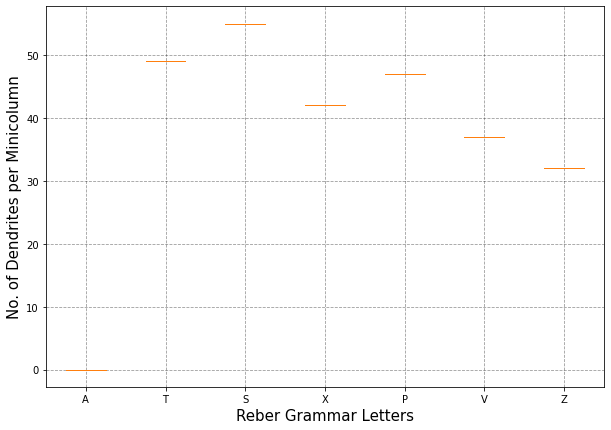

In [11]:
from matplotlib import rcParams
plt.figure(figsize=(10,7))
plt.boxplot(np.array(dendritesPerCharPerRun), labels=list(charsMC.columns))
#plt.set_xticklabels(f.get_xticklabels(), fontsize=17)
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
plt.xlabel('Reber Grammar Letters', fontsize=15)
plt.ylabel('No. of Dendrites per Minicolumn', fontsize=15)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
plt.show()
plt.close()

# relate this figure with trigrams count; and bias in the network for some trigrams over others

### Dendritic Growth with Time

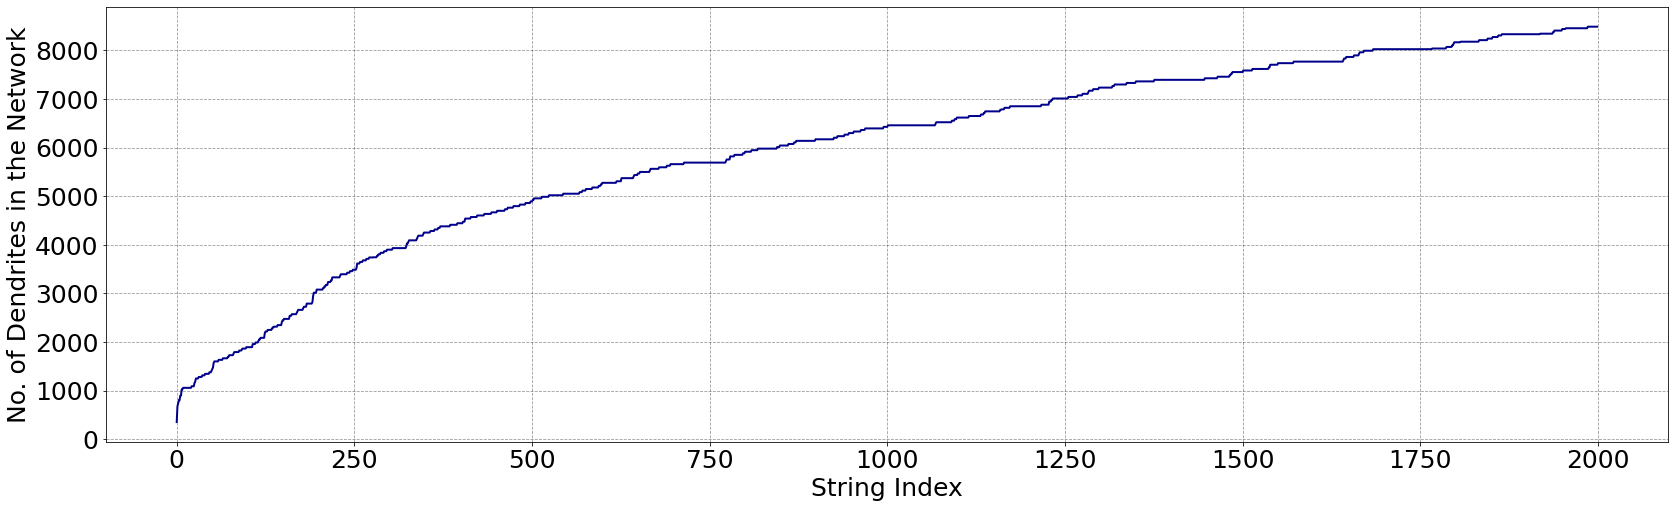

In [12]:
# PLOTTING THE NUMBER OF DENDRITES per Timestep
plt.figure(figsize=(28, 8))
plt.plot(list(results['nof_dendrites']), color='darkblue', lw=2)
plt.ylabel('No. of Dendrites in the Network', fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('String Index', fontsize=25)
plt.xticks(fontsize=25)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
plt.show()
plt.close()

AttributeError: 'Figure' object has no attribute 'set_xticklabels'

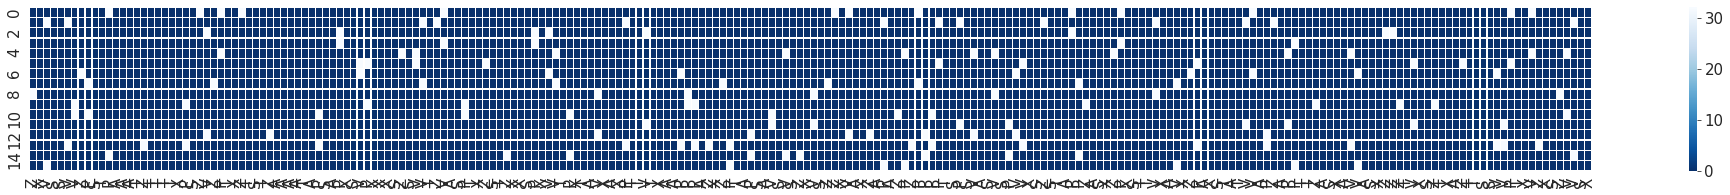

In [65]:
countSynapses_max = np.zeros(shape=[M,N])

for i in range(M):
    for j in range(N):
        countSynapses = []
        for d in range(maxDendritesPerCell):
            countSynapses.append(exp.htm_network.net_arch[i,j].get_cell_numSynapsesOnDendrite(d))
        
        countSynapses_max[i,j] = np.amax(countSynapses)

f = plt.figure(figsize=(35,3))
sns.heatmap(countSynapses_max, linewidth=0.1, xticklabels=xticks_plot, cmap='Blues_r')
f.set_xticklabels(f.get_xticklabels(), fontsize=11, rotation=0)
plt.show()

display(countSynapses_max[0])
display(np.amax(countSynapses_max))

##  Dendritic Architecture for ALL Cells in a Given Minicolumn after a particular `string_idx`

This section is to **plot the dendritic structure (32 MxN matrices)** of any given cell `(i,j)` in the pool right before the current reber string, as above, given by `string_idx`; and the change that occurs in the dendritic structure of the cell after the current reber string has been seen by the network. The updated dendritic structure of the cell can also be plotted.

In [255]:
%matplotlib notebook

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


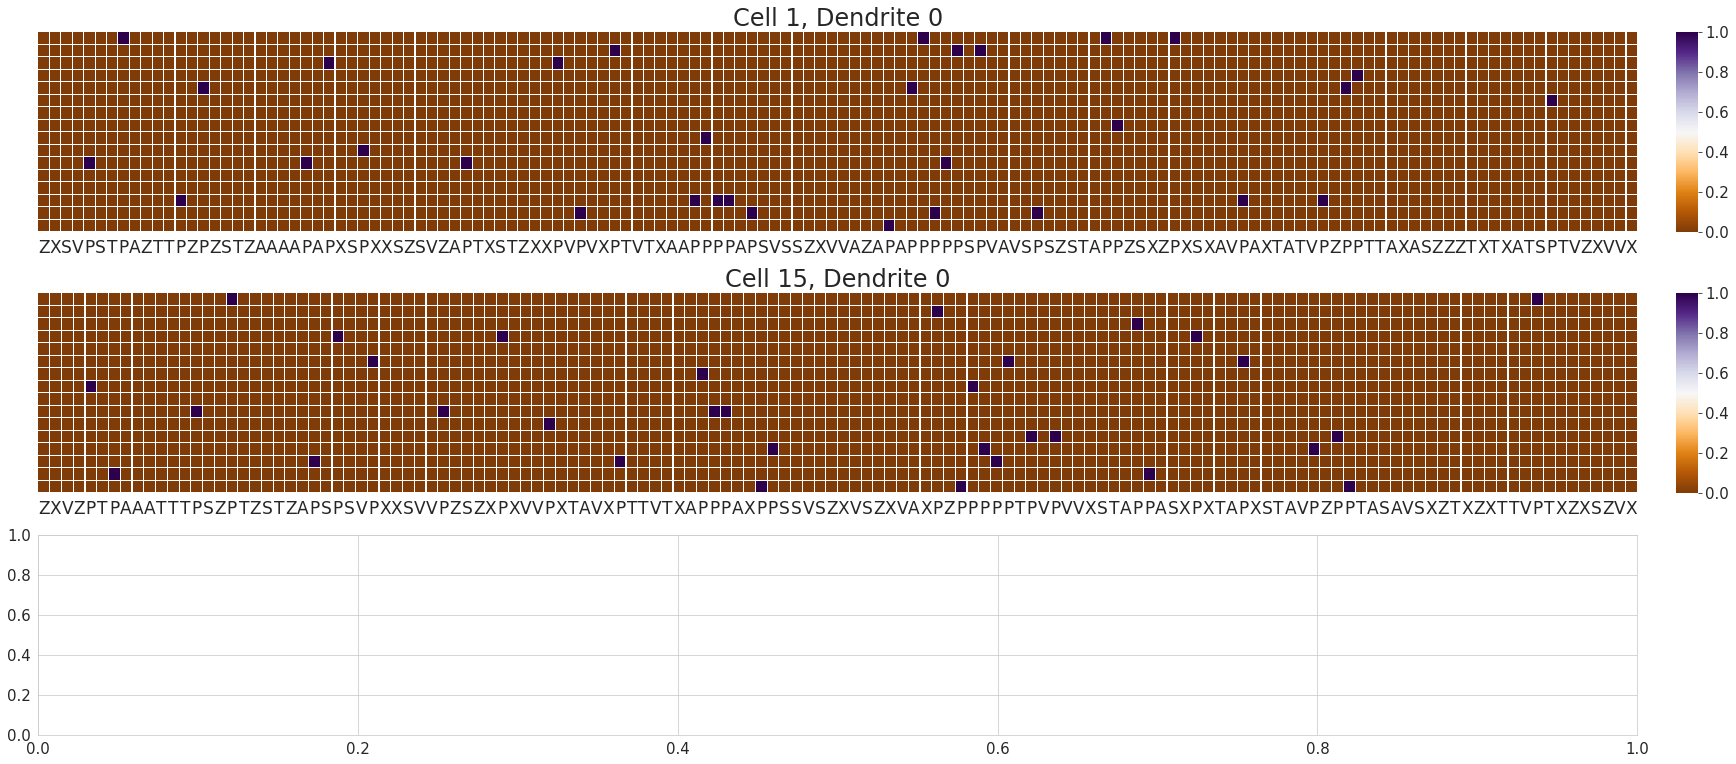

In [67]:
string_idx = 99
mc_idx = 2

res_string = results.iloc[string_idx]
all_cols = [c for c in range(N)]

cell_dendrite_idx = []
countDendrites_mc = []
for i in range(M):
    countDendrites_mc.append(final_net[i, mc_idx].get_cell_numDendrites())
    
    for dendrite in range(dict_params['maxDendritesPerCell']):
        if final_net[(i,mc_idx)].dendrites[dendrite] is None:
            continue
        else:
            cell_dendrite_idx.append((i, dendrite))

print(countDendrites_mc)
        
sns.set_style("whitegrid")
fig, axes = plt.subplots(len(cell_dendrite_idx)+1,1, figsize=(24, 3.5*(len(cell_dendrite_idx)+1)), constrained_layout=True)

for i, idx in enumerate(cell_dendrite_idx):
    
    dendrite = final_net[idx[0], mc_idx].dendrites[idx[1]]
    
    uninitialized_cols = [col for col in all_cols if dendrite[:, col].any()==False]
    deleted_cols = random.choices(uninitialized_cols, k=int(len(uninitialized_cols)/1.7))
    undeleted_cols = set(all_cols) - set(deleted_cols)
    
    sns.heatmap(dendrite[:, list(undeleted_cols)], vmax=1, vmin=0, linewidth=0.1, cmap='PuOr',
                ax=axes[i], xticklabels=xticks_plot[list(undeleted_cols)])
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=17)
    axes[i].set_yticklabels([])
    
#     axes[i].set_xticks(axes[i].get_xticks())
#     axes[i].set_xticklabels(xticks_plot, rotation=0, fontsize=8.5)
    axes[i].set_title(f'Cell {idx[0]}, Dendrite {idx[1]}', fontsize=24) #; Average permanence value: {np.sum(dendrite)/np.count_nonzero(dendrite)}', fontsize=17)
    
#     ax_ = axes[i].twiny()
#     ax_.set_xticks(axes[i].get_xticks())
#     ax_.set_xbound(axes[i].get_xbound())
#     ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90, fontsize=8)
#     ax_.tick_params(grid_alpha=0)

plt.show() 

### Evolution of Synapses on a Dendrite

In [110]:
string_idx = 28
cell_idx = (6,2)
dendrite_idx = 1

count_numSynapses = 0
for i in range(string_idx):
    print(i, np.count_nonzero(results.iloc[i]['htm_network'][cell_idx].dendrites[dendrite_idx]))

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 25
11 25
12 25
13 25
14 25
15 25
16 25
17 25
18 25
19 25
20 25
21 25
22 25
23 25
24 25
25 25
26 25
27 25


### Loading Files

In [ ]:
sys.getsizeof(dict_results['results'])

In [2]:
cd ./Results

/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation/Results


In [3]:
ls

network_figs/
trial_1_SRG_5000_chars_to_minicols.pickle
trial_1_SRG_5000_exp_params.pickle
trial_1_SRG_5000_in_strings_oh.pickle
trial_1_SRG_5000_out_strings_oh.pickle
trial_1_SRG_5000_results.pbz2
trial_2_SRG_2000_chars_to_minicols.pickle
trial_2_SRG_2000_exp_params.pickle
trial_2_SRG_2000_in_strings_oh.pickle
trial_2_SRG_2000_out_strings_oh.pickle
trial_2_SRG_2000_results.pbz2
trial_3_SRG_5000_chars_to_minicols.pickle
trial_3_SRG_5000_exp_params.pickle
trial_3_SRG_5000_in_strings_oh.pickle
trial_3_SRG_5000_out_strings_oh.pickle
trial_3_SRG_5000_results.pbz2
trial_4_SRG_5000_chars_to_minicols.pickle
trial_4_SRG_5000_exp_params.pickle
trial_4_SRG_5000_in_strings_oh.pickle
trial_4_SRG_5000_out_strings_oh.pickle
trial_4_SRG_5000_results.pbz2


In [4]:
do_ERG = False
trial = 'trial_1_'
nof_strings = 5000


if do_ERG:
    exp_filename = trial+'ERG_'+str(nof_strings)
else:
    exp_filename = trial+'SRG_'+str(nof_strings)
    
    
# USING PICKLE
filename = exp_filename+'_chars_to_minicols'
charsMC = unpickle(filename)

filename = exp_filename+'_rg_inputoutput'
rg_inputoutput = unpickle(filename)

filename = exp_filename+'_exp_params'
dict_params = unpickle(filename)

In [5]:
filename = exp_filename+'_results'
results = decompress_pickle(filename)
results.set_index('reber_string', inplace=True)

#results = dict_results['results']
#results.set_index('reber_string', inplace=True)

## 2. Network Activity & Predictivity

### 2.1 Computing Cellular Activity & Predictivity

In [7]:
%matplotlib inline

In [8]:
cell_activity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_activity += sum(results.iloc[string_idx]['htm_states']) # RHS sums up the net cellular activity 
                                                                 # for each letter of the string.
cell_predictivity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_predictivity += sum(results.iloc[string_idx]['htm_preds'])

# Normalizing the net cellular predictivity of each cell
cell_predictivity = (cell_predictivity/total_len_inputstream)*100
# Normalizing the net cellular activity of each cell
cell_activity = (cell_activity/total_len_inputstream)*100

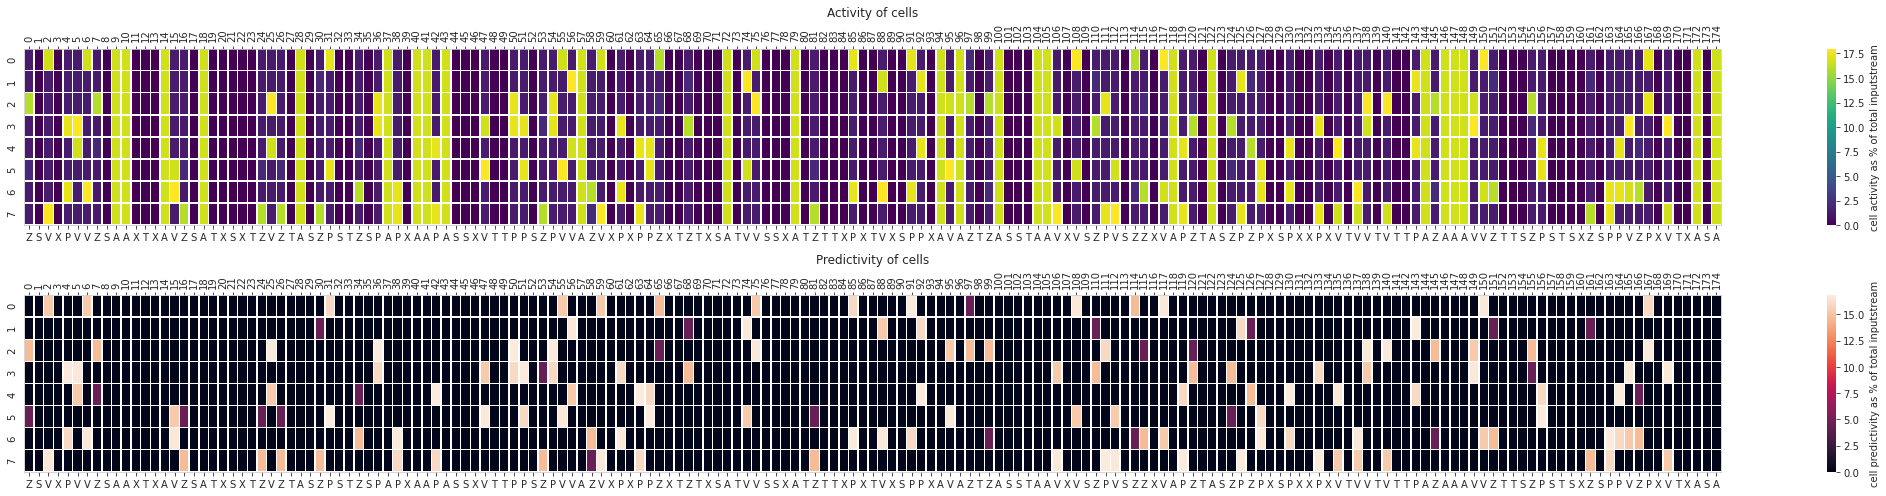

In [6]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,1, sharex=False, figsize=(30,7))

sns.heatmap(cell_activity, linewidth=0.5, cmap='viridis', xticklabels=xticks_plot, 
            ax=axes[0], cbar_kws={'label':'cell activity as % of total inputstream'})
axes[0].set_title('Activity of cells')
ax_0 = axes[0].twiny()
ax_0.set_xticks(axes[0].get_xticks())
ax_0.set_xbound(axes[0].get_xbound())
ax_0.set_xticklabels([str(i) for i in np.arange(N)], rotation=90)
ax_0.tick_params(grid_alpha=0)


sns.heatmap(cell_predictivity, linewidth=0.5, xticklabels=xticks_plot,
            ax=axes[1], cbar_kws={'label':'cell predictivity as % of total inputstream'})
axes[1].set_title('Predictivity of cells')
ax_0 = axes[1].twiny()
ax_0.set_xticks(axes[1].get_xticks())
ax_0.set_xbound(axes[1].get_xbound())
ax_0.set_xticklabels([str(i) for i in np.arange(N)], rotation=90)
ax_0.tick_params(grid_alpha=0)

plt.tight_layout()
plt.show()

xticks_pos = axes[0].get_xticks()

### 2.2 Cell Activity & Predictivity – Character-wise

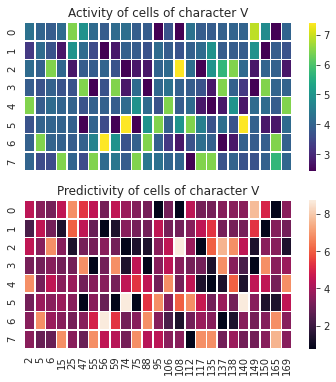

Character-wise Activity: 

 [[4.29958391 4.0221914  3.88349515 4.16088766 6.46324549 4.96532594
  4.16088766 3.88349515 4.16088766 4.21636616 3.9112344  3.88349515
  2.44105409 3.71705964 2.44105409 4.29958391 3.88349515 3.88349515
  3.9667129  4.0221914  4.0221914  6.90707351 4.82662968 2.44105409
  4.0221914 ]
 [3.27323162 4.16088766 3.71705964 2.74618585 4.99306519 4.16088766
  3.57836338 2.44105409 2.74618585 3.9667129  3.88349515 3.71705964
  4.16088766 3.88349515 3.71705964 3.9667129  4.16088766 4.96532594
  3.88349515 3.88349515 3.88349515 4.96532594 2.44105409 3.9112344
  3.71705964]
 [4.16088766 3.9667129  6.46324549 4.0776699  2.74618585 3.88349515
  3.88349515 4.0221914  3.71705964 2.44105409 2.74618585 2.74618585
  4.0221914  4.16088766 7.40638003 4.21636616 2.44105409 4.99306519
  5.71428571 6.46324549 4.16088766 2.74618585 4.0221914  3.9667129
  2.74618585]
 [3.88349515 3.71705964 3.9667129  3.71705964 3.71705964 6.46324549
  2.44105409 3.71705964 6.46324549 2.74618585 4.

In [12]:
char = 'V'

char_activity = cell_activity[:,list(charsMC[char])]
char_predictivity = cell_predictivity[:,list(charsMC[char])]

sns.set_style("whitegrid")
fig, axes = plt.subplots(2,1, sharex=True, figsize=(6,6))

sns.heatmap(char_activity, linewidth=0.5, cmap='viridis', xticklabels=list(charsMC[char]), ax=axes[0])
axes[0].set_title(f'Activity of cells of character {char}')
sns.heatmap(char_predictivity, linewidth=0.5, xticklabels=list(charsMC[char]), ax=axes[1])
axes[1].set_title(f'Predictivity of cells of character {char}')
plt.show()

print('Character-wise Activity: \n\n', char_activity)
print('\n\nCharacter-wise Predictivity: \n\n', char_predictivity)

## Network States and Predictions for a Given Reber String

In [14]:
%matplotlib inline

Showing Network States and Predictions for string: APSTXZ 




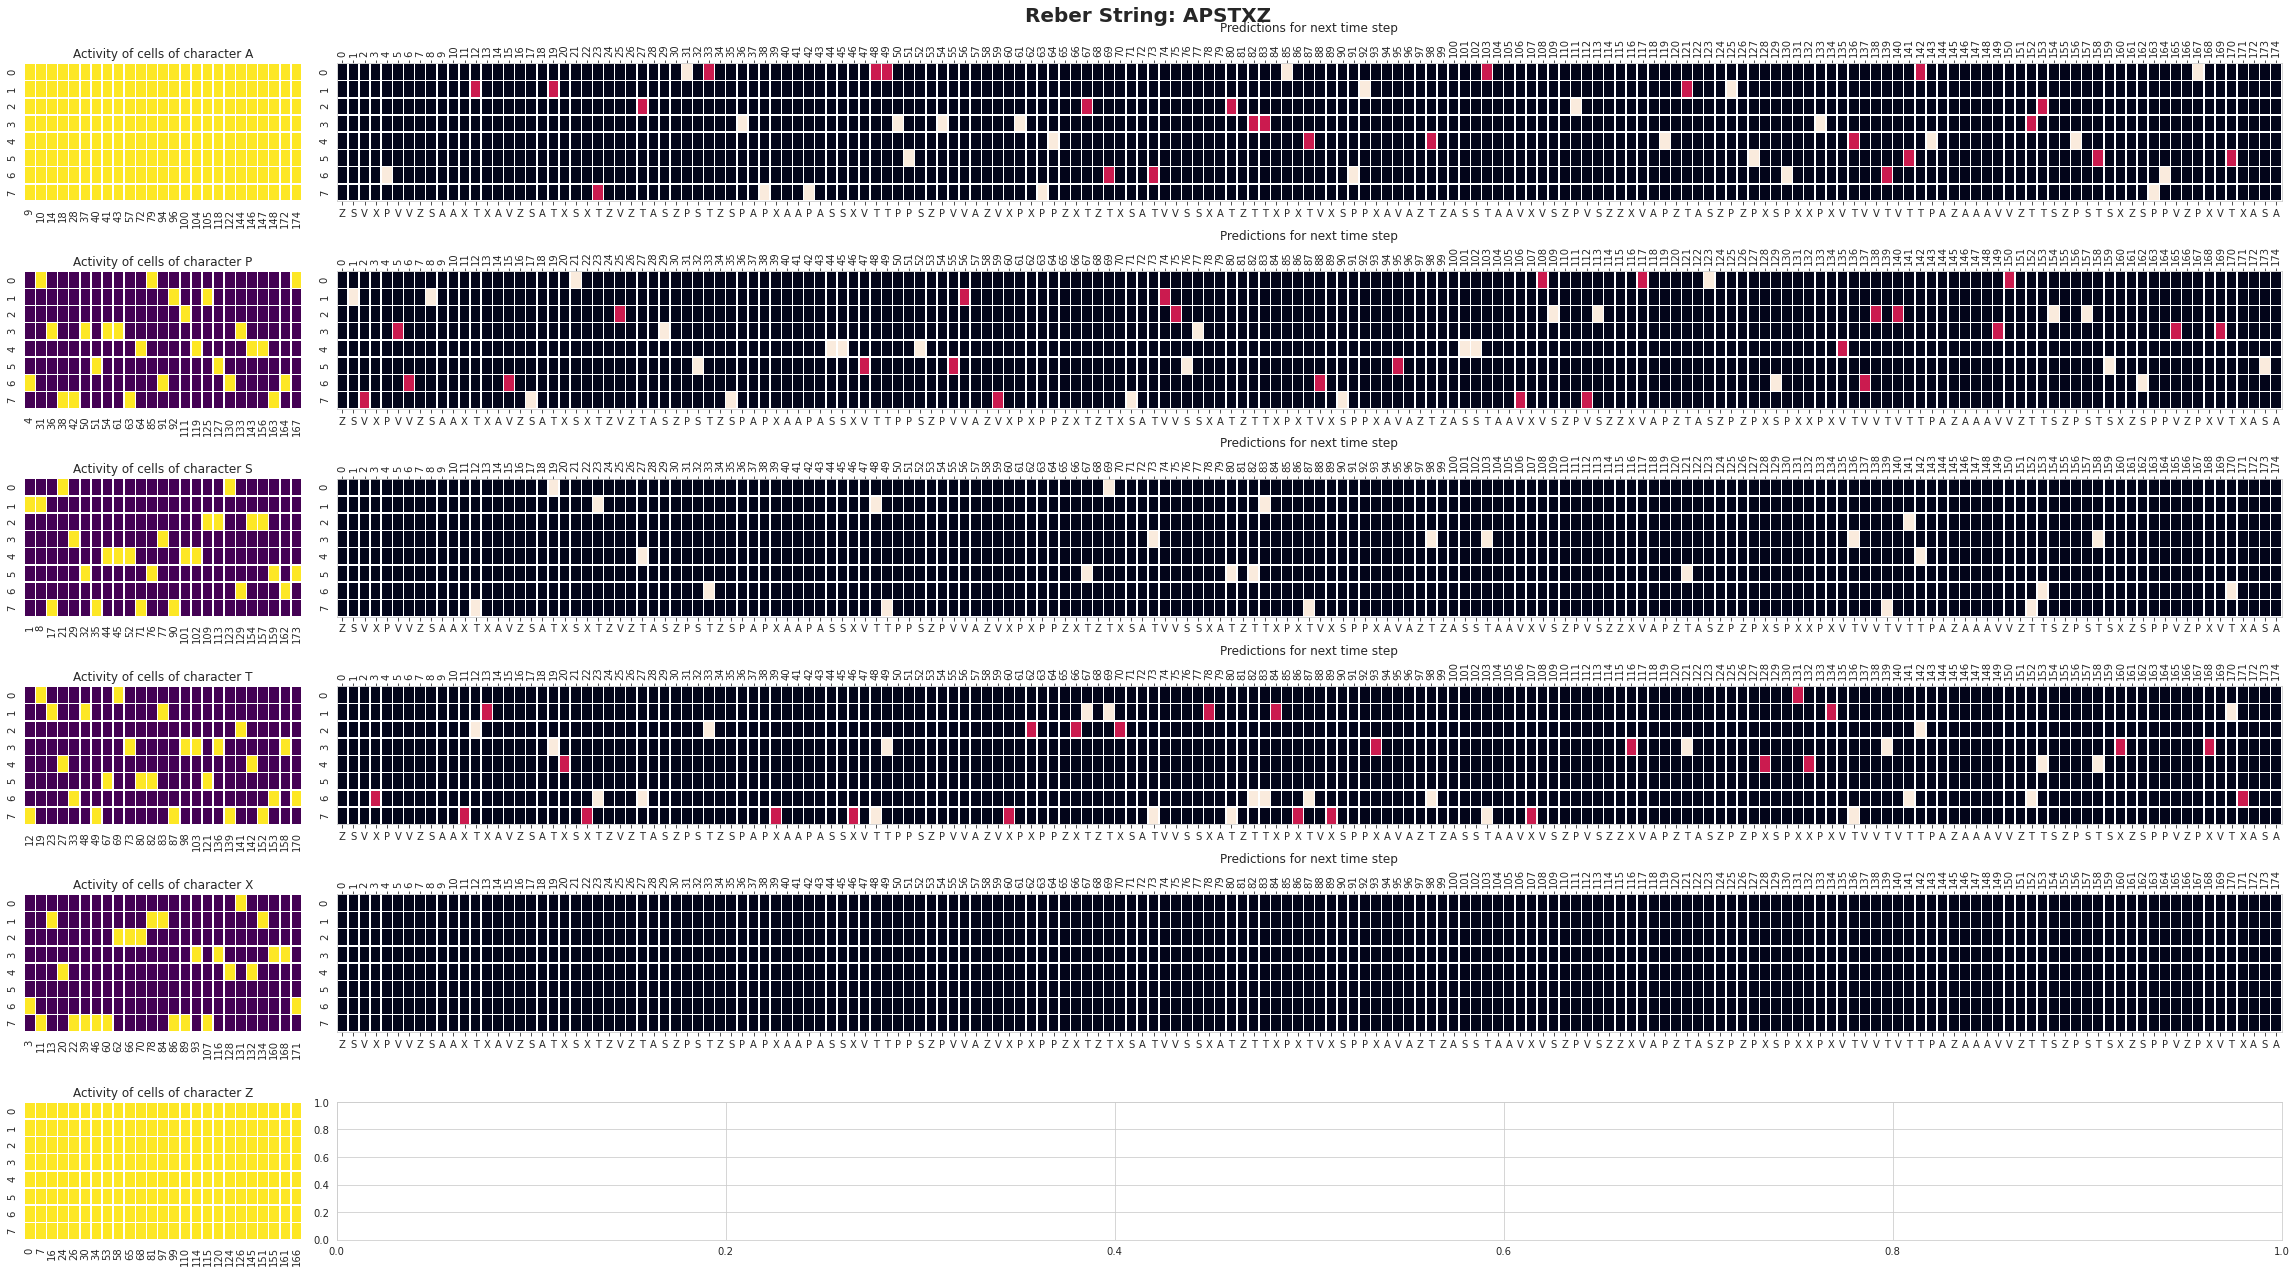

In [16]:
reber_string_idx = 90
reber_string = results.iloc[reber_string_idx].name
res_reber_string = results.iloc[reber_string_idx]

print(f'Showing Network States and Predictions for string: {reber_string} \n\n')

sns.set_style("whitegrid")
fig, axes = plt.subplots(len(reber_string),2, figsize=(32,3*len(reber_string)), gridspec_kw={'width_ratios': [1, 7]}) # '32' in figize denotes the width

for i in range(len(reber_string)):
    char = reber_string[i]
    
    # Plot the current step's character's (cell) activity
    sns.heatmap(res_reber_string['htm_states'][i][:, list(charsMC[char])], vmax=1, vmin=0, cbar=False, linewidth=0.5, cmap='viridis', 
                xticklabels=list(charsMC[char]), ax=axes[i][0])
    axes[i][0].set_title(f'Activity of cells of character {char}')
    
    
    if i<len(reber_string)-1:
        
        # Plot the next timestep's predictions
        
        predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] 
                  for idx in np.where(res_reber_string['htm_preds'][i])[1]])
    
        multiplying_arr = np.zeros(N)

        for k in range(len(predicted_chars)):
            multiplying_arr[list(charsMC[predicted_chars[k]])] = 1/(k+1)

        plot_predictions=[res_reber_string['htm_preds'][i][j]*multiplying_arr
                          for j in range(M)]

        sns.heatmap(plot_predictions, vmax=1, vmin=0, cbar=False, linewidth=0.5, xticklabels=xticks_plot, ax=axes[i][1])

        axes[i][1].set_title('Predictions for next time step')
        ax_ = axes[i][1].twiny()
        ax_.set_xticks(axes[i][1].get_xticks())
        ax_.set_xbound(axes[i][1].get_xbound())
        ax_.set_xticklabels([str(i) for i in np.arange(N)], rotation=90)
        ax_.tick_params(grid_alpha=0)
        
    else:
        continue
    
fig.suptitle(f'Reber String: {reber_string}', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::ROUGH::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [1]:
graph = [[(1,5),('T','P')] , [(1,2),('S','P')], \
           [(3,5),('V','X')], [(6),('Z')], \
           [(4,3),('T','X')], [(1,4),('V','S')]]

all_possibleTransitions = []
        
for i, subsequent_1 in enumerate(graph[0][1]):
    transition_to_1 = graph[0][0][i]
    
    for j, subsequent_2 in enumerate(graph[transition_to_1][1]):
        all_possibleTransitions.append('A'+subsequent_1+subsequent_2)
    
for startNode in graph:
    if startNode[1] == 'Z':
        continue
    
    for i, antecedent in enumerate(startNode[1]):
        if len(startNode[1]) == 1:
            transition_to_1 = startNode[0]
        else:
            transition_to_1 = startNode[0][i]
            
        for j, subsequent_1 in enumerate(graph[transition_to_1][1]): 
            if graph[transition_to_1][1] == 'Z':
                all_possibleTransitions.append(antecedent+subsequent_1)
                break
            elif len(graph[transition_to_1][1]) == 1:
                transition_to_2 = graph[transition_to_1][0]
            else:
                transition_to_2 = graph[transition_to_1][0][j]
            
            for subsequent_2 in graph[transition_to_2][1]:
                all_possibleTransitions.append(antecedent+subsequent_1+subsequent_2)        

len(all_possibleTransitions)

35

In [94]:
import multiprocessing

pool = multiprocessing.Pool()
num_figs = 5
input = zip(np.random.randint(10,1000,num_figs),range(num_figs))
pool.map(plot, input)

def plot(args):
    num, i = args
    print(num, i)
    fig = plt.figure()
    data = np.random.randn(num).cumsum()
    plt.plot(data)
    plt.title('Plot of a %i-element brownian noise sequence' % num)
    return fig


[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>]

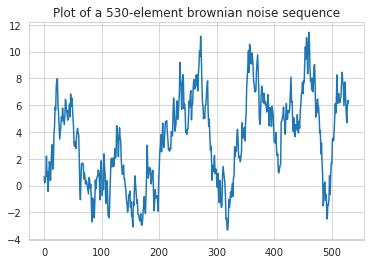

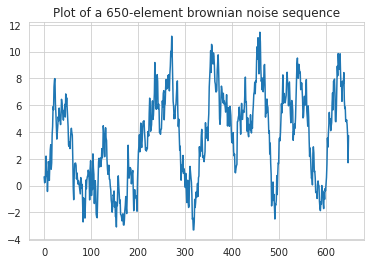

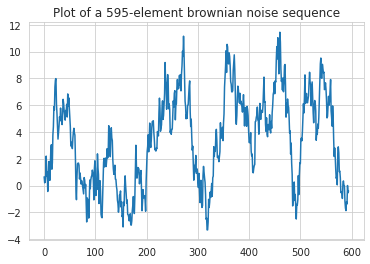

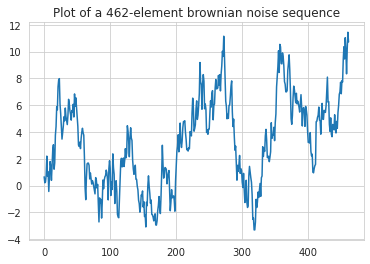

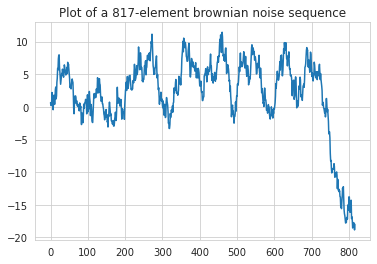

In [79]:
import multiprocessing

def plot_dendritesMinicolumn(plotData):
    num, i = args
    fig = plt.figure()
    data = np.random.randn(num).cumsum()
    plt.plot(data)
    plt.title('Plot of a %i-element brownian noise sequence' % num)
    return fig

pool = multiprocessing.Pool()
pool.map(plot_dendritesMinicolumn, plotData)

num_figs = 5
inpt = zip(np.random.randint(10,1000,num_figs), range(num_figs))

<IPython.core.display.Javascript object>


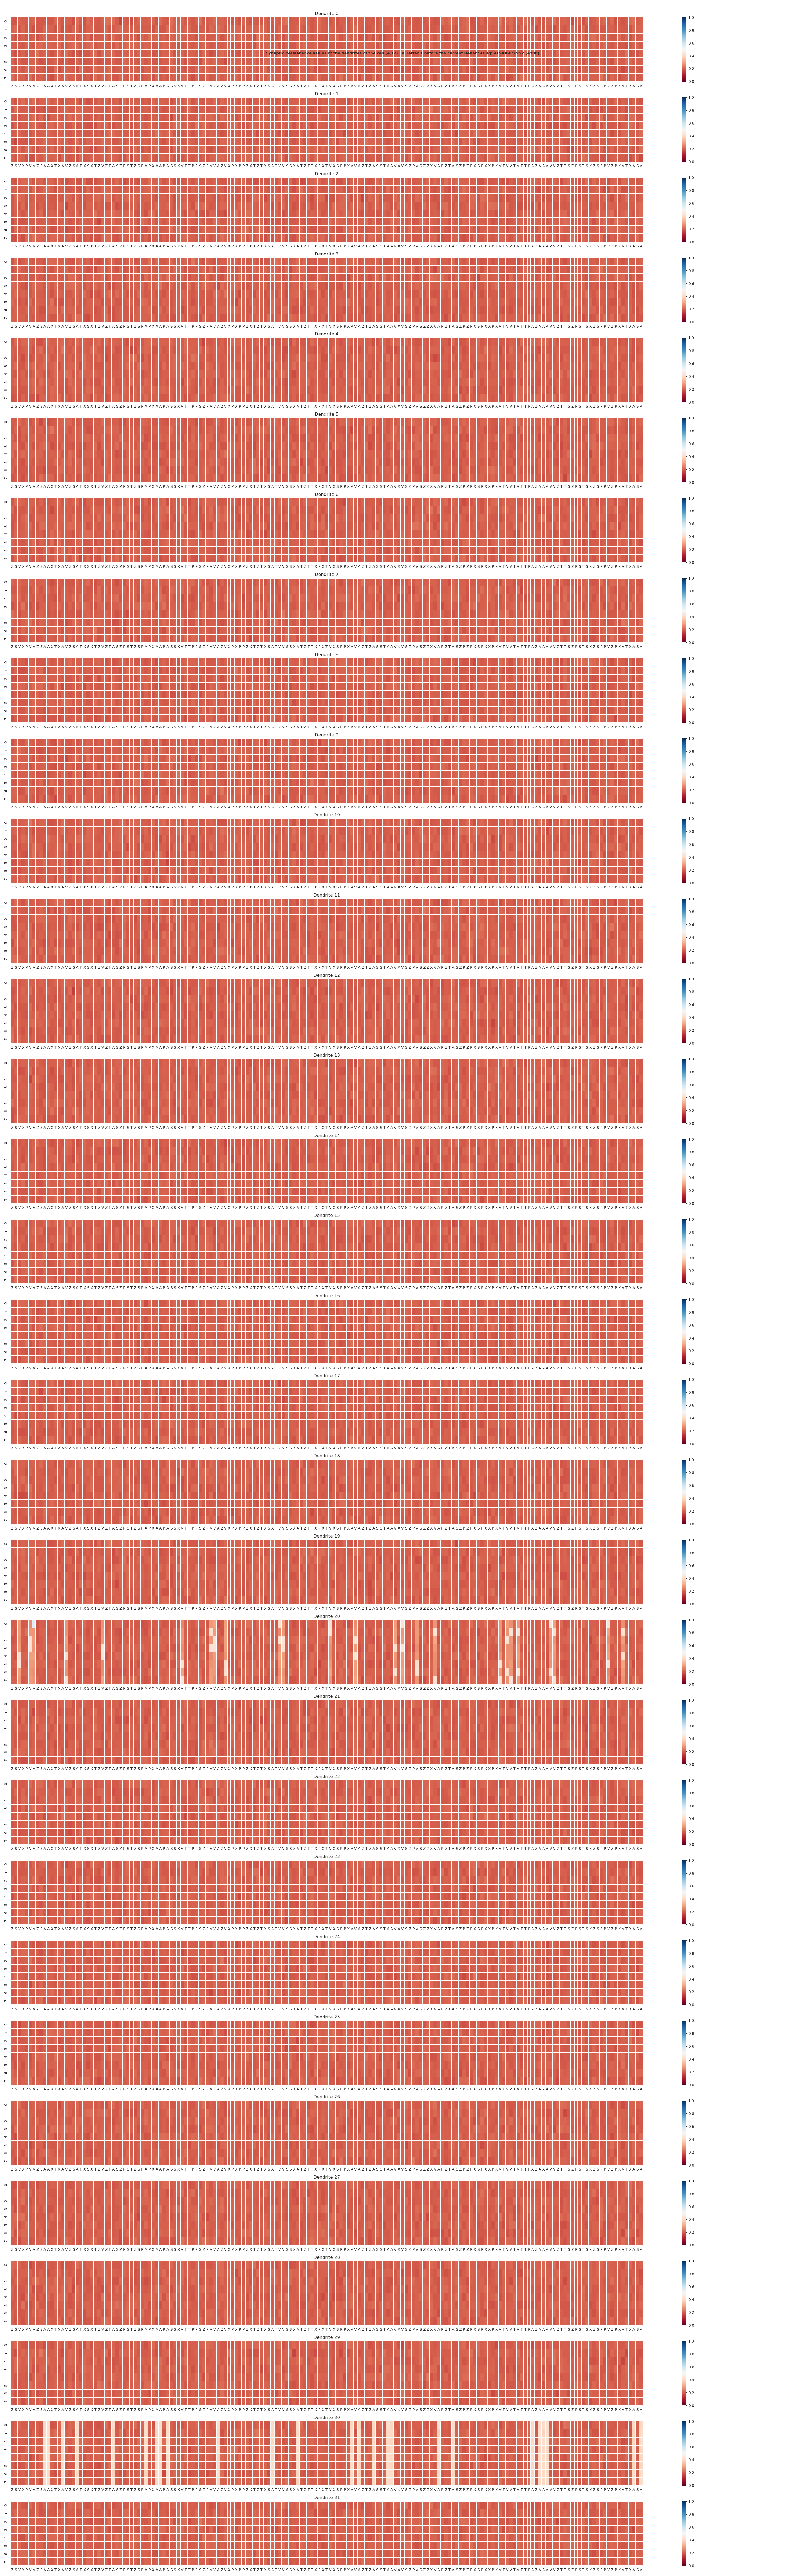

In [35]:
reber_string_idx = 4998
cell_idx = (4,12)

n_dendrites = dict_params['dendrites_percell']

sns.set_style("whitegrid")
fig, axes = plt.subplots(n_dendrites,1, figsize=(30,3*n_dendrites))

for d in range(n_dendrites):
    
    # Plot the permanence value just before the current Reber String    
    sns.heatmap(results.iloc[reber_string_idx]['htm_network'][cell_idx[0]][cell_idx[1]].dendrites[d], vmax=1, vmin=0, cbar=True, linewidth=0.5, cmap='RdBu', ax=axes[d])
    axes[d].set_title(f'Dendrite {d}')
    axes[d].set_xticks(xticks_pos)
    axes[d].set_xticklabels(xticks_plot, rotation=0)
           
fig.suptitle(f'Synaptic Permanence values of the dendrites of the cell ({cell_idx[0]},{cell_idx[1]}) i.e. letter {charsMC.columns[np.where(charsMC == cell_idx[1])[1]][0]} before the current Reber String: {results.iloc[reber_string_idx].name} ({reber_string_idx})', 
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


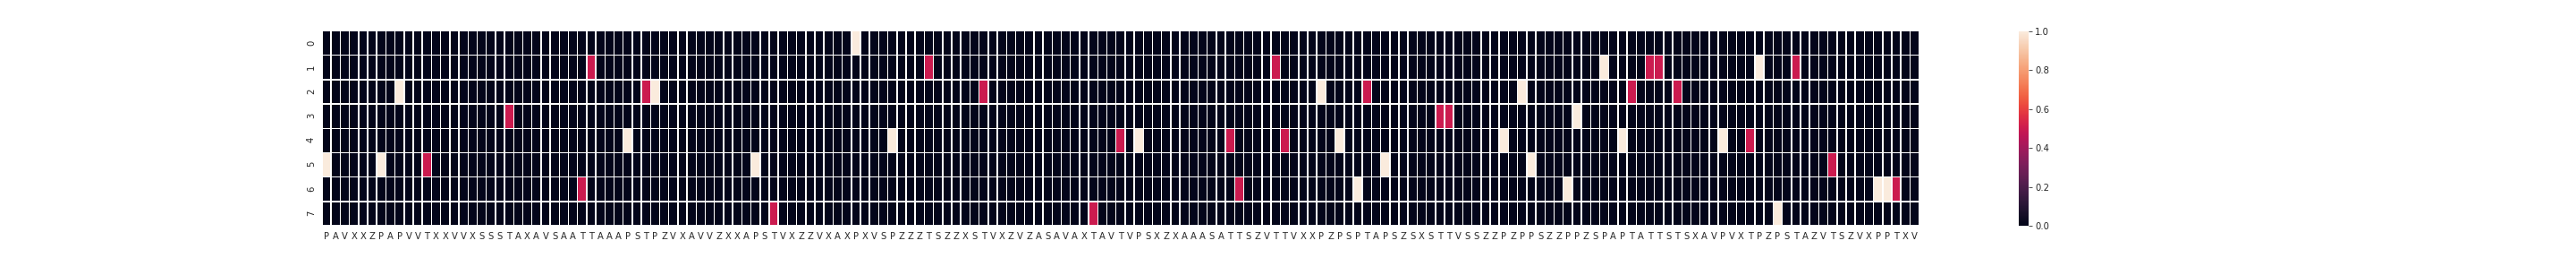

In [234]:
predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] 
                  for idx in np.where(results.iloc[999]['htm_preds'][0])[1]])
    
multiplying_arr = np.zeros(N)

for i in range(len(predicted_chars)):
    multiplying_arr[list(charsMC[predicted_chars[i]])] = 1/(i+1)
    
plot_predictions=[results.iloc[999]['htm_preds'][0][i]*multiplying_arr
                  for i in range(M)]
    
sns.heatmap(plot_predictions,linewidth=0.5, xticklabels=xticks_plot)
plt.show()
    

In [225]:
m = np.ones(N)
m[list(charsMC['P'])] = 1/3
m[list(charsMC['T'])] = 1/2
m

array([0.33333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.33333333, 1.        , 0.33333333, 1.        ,
       1.        , 0.5       , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.5       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.5       , 0.5       ,
       1.        , 1.        , 1.        , 0.33333333, 1.        ,
       0.5       , 0.33333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.33333333, 1.        , 0.5       ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 0.33333333, 1.        , 1.        ,
       1.        , 0.5       , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.5       , 1.        , 1.     

In [218]:
charsMC.columns[np.where(charsMC == 6)[1]][0]

'P'

### The entire calculation (step-by-step) for plotting next timestep's predictions in section 3. above

In [235]:
predicted_cols_idx = np.where(res_string['htm_preds'][i])[1]

predicted_char = []
for idx in predicted_cols_idx:
    predicted_char.append(charsMC.columns[np.where(charsMC == idx)[1]][0])

predicted_chars = np.unique(predicted_char)
multiplying_arr = np.zeros(N)

for i in range(len(predicted_chars)):
    multiplying_arr[list(charsMC[predicted_chars[i]])] = 1/(i+1)

plot_predictions=[]
for i in range(M):
    plot_predictions.append(results.iloc[999]['htm_preds'][0][i]*multiplying_arr)

plt.figure(figsize=(40,4))
sns.heatmap(plot_predictions,linewidth=0.5, xticklabels=xticks_plot)


NameError: name 'res_string' is not defined

In [ ]:
results.iloc[222]['htm_preds'][4]

In [ ]:
p = np.zeros(N)
p[np.where(results.iloc[222]['htm_preds'][4])[1]] = 1
print(p)
np.where(results.iloc[222]['htm_preds'][4])[1]

In [ ]:
np.shape(results.iloc[4999]['htm_preds'])

In [ ]:
np.where(out_strings_onehot[4999][0])[0]

In [ ]:
a = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1])
b = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1])


count=0
for col_idx in np.where(a)[0]:
    if col_idx in np.where(b)[0]:
        count+=1

accuracy = count/len(np.where(b)[0])

accuracy

In [ ]:
#np.shape(results.iloc[0]['htm_states'])

sum(results.iloc[1]['htm_states'])